<a href="https://colab.research.google.com/github/galrat/Neural_Networks_and_CV/blob/master/CN_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deep-translator
!pip install xlsxwriter
!pip install googletrans==4.0.0-rc1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=e49df997765ff082580842dd2b5ee9738dc56a6151bea11ba9b29ce614055325
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from googletrans import Translator

In [3]:
FIGSIZE = (12, 6)

In [37]:
country = 'CN'
LANGUAGE_CODE = 'zn-cn'
file_paths = ['/content/cn 04-15.csv', '/content/cn 16 (2).csv', '/content/cn 17 (2).csv', '/content/cn 18 (2).csv', '/content/cn 19 (2).csv', '/content/cn 20 (2).csv',
              '/content/cn 21 (2).csv', '/content/cn 22 (2).csv', '/content/cn 23 (2).csv', '/content/cn 24 (2).csv']

country = 'US'
LANGUAGE_CODE = 'eng'
file_paths = ['/content/us 04-14 271124.csv', '/content/us 15 271124.csv', '/content/us 16 271124.csv', '/content/us 17 271124.csv', '/content/us 18 271124.csv', '/content/us 19 271124.csv',
              '/content/us 20 271124.csv', '/content/us 21 271124.csv', '/content/us 22 271124.csv', '/content/us 23 271124.csv', '/content/us 24 271124.csv']

country = 'KR'
LANGUAGE_CODE = 'ko'
file_paths = ['/content/kr 04-14 271124.csv', '/content/kr 15 271124 2.csv', '/content/kr 16 271124.csv', '/content/kr 17 271124 2.csv', '/content/kr 18 271124 2.csv',
              '/content/kr 19 271124.csv', '/content/kr 20 271124.csv', '/content/kr 21 271124.csv', '/content/kr 22 271124.csv', '/content/kr 23 271124.csv',
              '/content/kr 24 271124.csv']

country = 'EP'
LANGUAGE_CODE = 'en'
file_paths = ['/content/EP 04-14 271124.csv', '/content/EP 15 271124.csv', '/content/EP 16 271124.csv', '/content/EP 17 271124.csv', '/content/EP 18 271124.csv',
              '/content/EP 19 271124.csv', '/content/EP 20 271124.csv', '/content/EP 21 271124.csv', '/content/EP 22 271124.csv', '/content/EP 23 271124.csv',
              '/content/EP 24 271124.csv']

country = 'JP'
LANGUAGE_CODE = 'ja'
file_paths = ['/content/JP 04-14 271124.csv', '/content/JP 15 271124.csv', '/content/JP 16 271124.csv', '/content/JP 17 271124.csv', '/content/JP 18 271124.csv',
              '/content/JP 19 271124.csv', '/content/JP 20 271124.csv', '/content/JP 21 271124.csv', '/content/JP 22 271124.csv', '/content/JP 23 271124.csv',
              '/content/JP 24 271124.csv']

In [38]:

def combine_csv_files(file_paths):
    """Combines multiple CSV files into a single DataFrame, skipping the first two rows of each file.

    Args:
      file_paths: A list of file paths to CSV files.

    Returns:
      A pandas DataFrame containing the combined data.
    """
    all_data = []
    for file_path in file_paths:
        try:
          # Attempt to read the CSV file, skipping the first two rows.
          df = pd.read_csv(file_path, skiprows=1)
          all_data.append(df)
        except FileNotFoundError:
          print(f"Warning: File not found: {file_path}")
        except pd.errors.ParserError:
          print(f"Warning: Error parsing CSV file: {file_path}")

    # Concatenate all DataFrames into a single DataFrame
    if all_data:
      combined_df = pd.concat(all_data, ignore_index=True)
      return combined_df
    else:
      return pd.DataFrame()  # Return an empty DataFrame if no valid files are found

# Example usage:
combined_dataframe = combine_csv_files(file_paths)
combined_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2577 non-null   object
 1   title                       2577 non-null   object
 2   assignee                    2509 non-null   object
 3   inventor/author             2509 non-null   object
 4   priority date               2546 non-null   object
 5   filing/creation date        2577 non-null   object
 6   publication date            2577 non-null   object
 7   grant date                  1036 non-null   object
 8   result link                 2577 non-null   object
 9   representative figure link  2044 non-null   object
dtypes: object(10)
memory usage: 201.5+ KB


In [39]:
combined_dataframe.columns
combined_dataframe = combined_dataframe[['id', 'title', 'assignee', 'priority date', 'filing/creation date', 'publication date', 'grant date']]

In [40]:
#combined_dataframe.to_excel(f'{country}_combined_data.xlsx', engine='xlsxwriter', index=False)

In [41]:
keywords = ['marine ', 'underwater', 'submerg', 'ground vehicle']
pattern = '|'.join(keywords)
print(len(combined_dataframe))
combined_dataframe = combined_dataframe[~combined_dataframe['title'].str.contains(pattern, case=False, na=False)]
print(len(combined_dataframe))

2577
2534


# динамика подачи

In [42]:
filing_years = pd.to_datetime(combined_dataframe['filing/creation date'], errors='coerce')
print(len(filing_years))
filing_years = filing_years.dt.year.value_counts().sort_index()

grant_years = pd.to_datetime(combined_dataframe.dropna(subset=['grant date'])['filing/creation date'], errors='coerce')
print(len(grant_years))
grant_years = grant_years.dt.year.value_counts().sort_index()

years_all = [i for i in range(filing_years.index.min(), filing_years.index.max()+1)]

2534
1017


In [43]:
years_df = pd.DataFrame({'Filing Years': filing_years, 'Grant Years': grant_years})

# Fill NaN values with 0 (you can choose a different strategy if needed)
years_df = years_df.fillna(0)

# Reindex to include all years and fill missing years with 0
#years_all = range(min(years_df.index.min(), years_df.index.min()), max(years_df.index.max(), years_df.index.max()) + 1)
years_df = years_df.reindex(years_all, fill_value=0)

# Convert columns to integers if necessary (in case fillna created floats)
years_df['Filing Years'] = years_df['Filing Years'].astype(int)
years_df['Grant Years'] = years_df['Grant Years'].astype(int)

# Save to Excel
years_df.to_excel(country + '_combined_years.xlsx', engine='xlsxwriter')

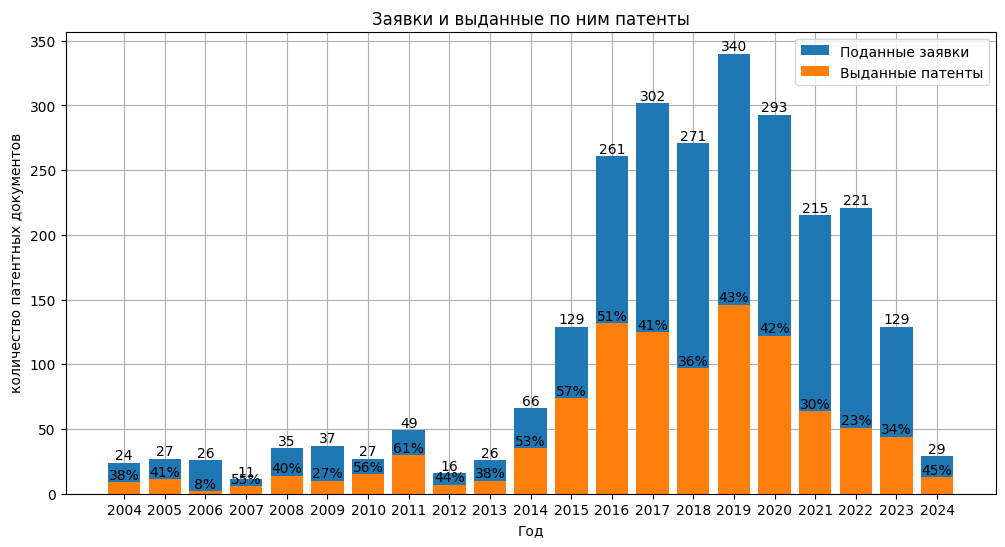

In [44]:
granted_applications_per_year = grant_years
applications_per_year = filing_years
MAX_VALUE = filing_years.max()

granted_percentage = (granted_applications_per_year / applications_per_year) * 100

# Create the bar plot with overlapping bars
fig, ax = plt.subplots(figsize=FIGSIZE)  # Create figure and axes explicitly

# Plot applications_per_year
ax.bar(applications_per_year.index, applications_per_year.values, label='Поданные заявки', color='#1f77b4')

# Plot granted_applications_per_year
ax.bar(granted_applications_per_year.index, granted_applications_per_year.values, label='Выданные патенты', color='#ff7f0e')

# Add value labels for applications_per_year
threshold = 0
for i, value in enumerate(applications_per_year):
    if i < threshold:
        ax.text(applications_per_year.index[i], value + 0, str(value), ha='center', va='bottom')
    else:
        ax.text(applications_per_year.index[i], value, str(value), ha='center', va='bottom')

# Add percentage labels for granted_applications_per_year
for i, (value, percentage) in enumerate(zip(granted_applications_per_year, granted_percentage)):
    if value < 17 or percentage < 10:
        shift = 0
    else:
      shift = 0
    if i < threshold:
        ax.text(granted_applications_per_year.index[i], value + 0 + shift, f'{percentage:.0f}%', ha='center', va='top')
    else:
        ax.text(granted_applications_per_year.index[i], value + 0 + shift, f'{percentage:.0f}%', ha='center', va='bottom')

# Configure labels, legend, and grid
ax.set_xlabel('Год')
ax.set_ylabel('количество патентных документов')
ax.set_title('Заявки и выданные по ним патенты')
ax.set_xticks(years_all)
ax.legend()
ax.grid(True)
ax.set_axisbelow(True)

# Save the figure as an SVG file
plt.savefig(country + '_file_grant_dynamic.svg', format='svg')

plt.show()


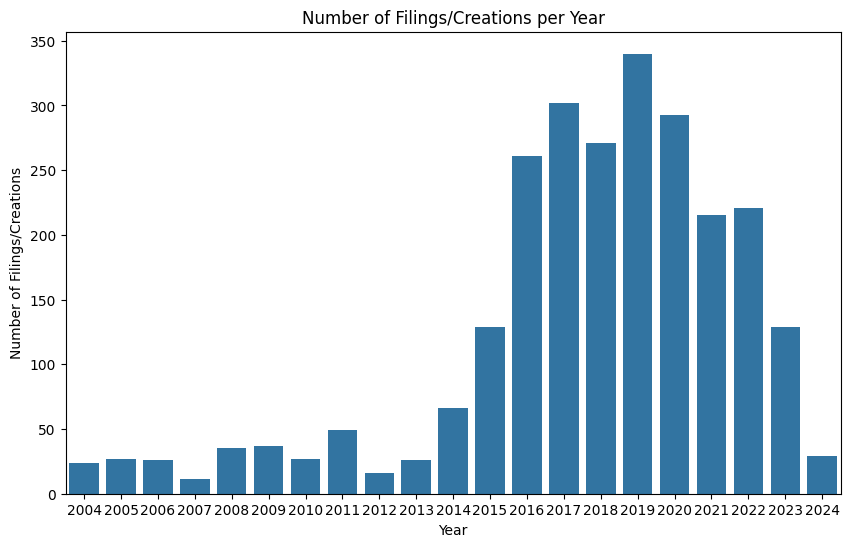

In [45]:
# prompt: show bar diagram of df['filing/creation date'] dynamic per years


import seaborn as sns

# Assuming 'combined_dataframe' is already defined from the previous code
# and contains a column named 'filing/creation date'.

# Convert 'filing/creation date' to datetime objects if it's not already
combined_dataframe['filing/creation date'] = pd.to_datetime(combined_dataframe['filing/creation date'], errors='coerce')

# Extract the year from the 'filing/creation date' column
combined_dataframe['filing_year'] = combined_dataframe['filing/creation date'].dt.year

# Group by year and count the occurrences
year_counts = combined_dataframe.groupby('filing_year')['filing_year'].count()


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Filings/Creations")
plt.title("Number of Filings/Creations per Year")
plt.show()

# анализ заявителей

In [46]:
# prompt: delete ", Ltd." and ", Inc." from combined_dataframe.assignee

# Remove ", Ltd." and ", Inc." from the 'assignee' column
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', Ltd.', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', Ltd', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', Inc.', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', Inc', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', Llc', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', Llc.', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(' Co.', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(' Inc.', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(' Llc', '', case=False, regex=False)
combined_dataframe['assignee'] = combined_dataframe['assignee'].str.replace(', L.P.', '', case=False, regex=False)



In [47]:
expanded_assignees = combined_dataframe['assignee'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Rename the expanded column to 'assignee'
expanded_assignees.name = 'assignee'

# Create a new DataFrame with the expanded assignees
expanded_df = combined_dataframe.drop('assignee', axis=1).join(expanded_assignees)

# Now 'expanded_df' contains the expanded 'assignee' column, where each assignee is on a separate row
print(len(combined_dataframe['assignee']), len(expanded_df))

2534 4709


In [48]:
top_applicants_names = expanded_df['assignee'].value_counts().head(50).index
top_applicants_names


Index(['エスゼット  ディージェイアイ  テクノロジー  カンパニー  リミテッド',
       'エスゼット ディージェイアイ テクノロジー カンパニー リミテッドＳｚ Ｄｊｉ Ｔｅｃｈｎｏｌｏｇｙ Ｃｏ．，Ｌｔｄ',
       '株式会社ナイルワークス', '株式会社プロドローン', '智幸 伊豆', '楽天グループ株式会社', 'ヤマハ発動機株式会社',
       '三菱ロジスネクスト株式会社', '中国電力株式会社', 'イームズロボティクス株式会社', 'Eams Robotics Ltd',
       'パロット', '楽天株式会社', 'パナソニックＩｐマネジメント株式会社', 'トヨタ自動車株式会社',
       'ハネウェル・インターナショナル・インコーポレーテッド', 'キヤノンマーケティングジャパン株式会社',
       'Yamaha Motor Co Ltd', 'Prodrone Co Ltd', '株式会社Ｉｈｉエアロスペース', '日本電気株式会社',
       '学校法人千葉工業大学', 'Eams Lab Co Ltd', 'Mitsubishi Logisnext Co Ltd',
       'Ｉｈｉ運搬機械株式会社', 'Tomoyuki Izu', 'ザ・ボーイング・カンパニー', '株式会社イームズラボ',
       '三菱重工業株式会社', '株式会社Ｉｈｉ', 'Canon Marketing Japan Inc', 'Nileworks Inc',
       '株式会社Ｊｖｃケンウッド', 'パロット ドローンズ', 'パロット  ドローンズ', 'ヒロボー株式会社',
       'エアロバイロメント，インコーポレイテッド', '株式会社小松製作所', 'Parrot Drones',
       'Sz Dji Technology Co Ltd',
       'パナソニック インテレクチュアル プロパティ コーポレーション オブ アメリカＰａｎａｓｏｎｉｃ Ｉｎｔｅｌｌｅｃｔｕａｌ Ｐｒｏｐｅｒｔｙ Ｃｏｒｐｏｒａｔｉｏｎ ｏｆ Ａｍｅｒｉｃａ',
       '三菱電機株式会社', 'パナソニック  インテレクチュアル  プロパティ  コーポレーション

In [49]:
# prompt: translate top_applicants_names from LANGUAGE_CODE to english

from googletrans import Translator

translator = Translator()

translated_names = []
for name in top_applicants_names:
    try:
        translation = translator.translate(name, dest='en')
        translated_names.append(translation.text)
    except Exception as e:
        print(f"Error translating '{name}': {e}")
        translated_names.append(name)  # Keep the original name if translation fails
translated_names

['Eszette Dejei Ai Technology Company Limited',
 'Eszet Dejei Ai Technology Company Limited Limited SZ DJI TECHNOLOGY CO., LTD',
 'Nile Works Co., Ltd.',
 'Prodele Co., Ltd.',
 'Izu',
 'Rakuten Group Co., Ltd.',
 'Yamaha Motor Co., Ltd.',
 'Mitsubishi Logis Next Co., Ltd.',
 'China Electric Power Co., Ltd.',
 'Erlobotics Co., Ltd.',
 'Eams Robotics Ltd',
 'Parot',
 'Rakuten Co., Ltd.',
 'Panasonic IP Management Co., Ltd.',
 'Toyota Motor Co., Ltd.',
 'Hanewell International Incorporated',
 'Canon Marketing Japan Co., Ltd.',
 'Yamaha Motor Co Ltd',
 'Prodrone Co Ltd',
 'IHI Aeros Pace Co., Ltd.',
 'NEC Co., Ltd.',
 'School Corporation Chiba Institute of Technology',
 'Eams Lab Co Ltd',
 'Mitsubishi Logisnext Co Ltd',
 'IHI Transport Machinery Co., Ltd.',
 'Tomoyuki Izu',
 'The Boeing Company',
 'Eames Lab Co., Ltd.',
 'Mitsubishi Heavy Industries Co., Ltd.',
 'IHI Co., Ltd.',
 'Canon Marketing Japan Inc',
 'Nileworks Inc',
 'JVC Kenwood Co., Ltd.',
 'Parot Dorones',
 'Parot Dorones',
 '

In [50]:
# prompt: make translate_dictionary with keys df['assignee'] and values df['Translated_Text']

translate_dictionary = dict(zip(top_applicants_names, translated_names))
translate_dictionary

{'エスゼット  ディージェイアイ  テクノロジー  カンパニー  リミテッド': 'Eszette Dejei Ai Technology Company Limited',
 'エスゼット ディージェイアイ テクノロジー カンパニー リミテッドＳｚ Ｄｊｉ Ｔｅｃｈｎｏｌｏｇｙ Ｃｏ．，Ｌｔｄ': 'Eszet Dejei Ai Technology Company Limited Limited SZ DJI TECHNOLOGY CO., LTD',
 '株式会社ナイルワークス': 'Nile Works Co., Ltd.',
 '株式会社プロドローン': 'Prodele Co., Ltd.',
 '智幸 伊豆': 'Izu',
 '楽天グループ株式会社': 'Rakuten Group Co., Ltd.',
 'ヤマハ発動機株式会社': 'Yamaha Motor Co., Ltd.',
 '三菱ロジスネクスト株式会社': 'Mitsubishi Logis Next Co., Ltd.',
 '中国電力株式会社': 'China Electric Power Co., Ltd.',
 'イームズロボティクス株式会社': 'Erlobotics Co., Ltd.',
 'Eams Robotics Ltd': 'Eams Robotics Ltd',
 'パロット': 'Parot',
 '楽天株式会社': 'Rakuten Co., Ltd.',
 'パナソニックＩｐマネジメント株式会社': 'Panasonic IP Management Co., Ltd.',
 'トヨタ自動車株式会社': 'Toyota Motor Co., Ltd.',
 'ハネウェル・インターナショナル・インコーポレーテッド': 'Hanewell International Incorporated',
 'キヤノンマーケティングジャパン株式会社': 'Canon Marketing Japan Co., Ltd.',
 'Yamaha Motor Co Ltd': 'Yamaha Motor Co Ltd',
 'Prodrone Co Ltd': 'Prodrone Co Ltd',
 '株式会社Ｉｈｉエアロスペース': 'IHI Aeros Pace Co., 

In [51]:
expanded_df['assignee'] = expanded_df['assignee'].replace(translate_dictionary)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Co., Ltd.', 'Co. Ltd.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Sz Dji Technology Co. Ltd., Sz Dji Technology Co. Ltd.', 'Sz Dji Technology Co. Ltd.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Sz Dji Technology Co. Ltd., Sz Dji Technology Co Ltd, Sz Dji Technology Co. Ltd.', 'Sz Dji Technology Co. Ltd.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('エスゼット ディージェイアイ テクノロジー カンパニー リミテッド', 'Sz Dji Technology Co. Ltd.', regex=False)

expanded_df['assignee'] = expanded_df['assignee'].str.replace('Toyota Industries Corp', 'Toyota', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Toyota Motor Corp', 'Toyota', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Toyota, Toyotaoration', 'Toyota', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Toyotaoration', 'Toyota', regex=False)

expanded_df['assignee'] = expanded_df['assignee'].str.replace('Mitsubishi Logisnext Co. Ltd.', 'Mitsubishi', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Mitsubishi Logisnext Co Ltd', 'Mitsubishi', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Rakuten Group, Inc.', 'Rakuten, Inc.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Parrot Drones, Parrot Drones', 'Parrot', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Nippon Yusoki Co Ltd, Nippon Yusoki Co Ltd', 'Nippon Yusoki Co Ltd', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Komatsu Ltd.', 'Komatsu Ltd', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Yamaha Motor Co. Ltd.', 'Yamaha Motor Co Ltd', regex=False)

expanded_df['assignee'] = expanded_df['assignee'].str.replace('Nileworks Inc.', 'Nileworks Inc', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Mitsubishi Heavy Industries, Ltd.', 'Mitsubishi', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Mitsubishi Nichiyu Forklift Co Ltd', 'Mitsubishi', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('三菱電機株式会社, Mitsubishi Electric Corp', 'Mitsubishi', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('本田技研工業株式会社, Honda Motor Co Ltd', 'Honda', regex=False)

expanded_df['assignee'] = expanded_df['assignee'].str.replace('Panasonic Intellectual Property Corporation of America, Panasonic Intellectual Property Corporation of America', 'Panasonic IP Management Co. Ltd.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('パナソニックＩｐマネジメント株式会社, Panasonic Ip Management Corp', 'Panasonic IP Management Co. Ltd.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('株式会社豊田自動織機', 'Toyota', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('三菱電機株式会社', 'Mitsubishi', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Parrot Drones', 'Parrot', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Telefonaktiebolaget LM Ericsson (publ)', 'Telefonaktiebolaget LM Ericsson (PUBL)', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('BAE Systems PLC', 'BAE SYSTEMS plc', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Sony Group Corporation, Sony Europe B.V.', 'Sony Group Corporation', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('SZ DJI Osmo Technology Co. Ltd.', 'SZ DJI Technology Co. Ltd.', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Co. Ltd.', 'Co Ltd', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Co., Ltd.', 'Co Ltd', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Wal-Mart Stores, Inc.', 'Walmart Apollo, Llc', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].str.replace('Co., Ltd', 'Co Ltd', regex=False)
expanded_df['assignee'] = expanded_df['assignee'].replace({'korea': 'Republic of Korea'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'プロドローン Co Ltd': 'Prodrone Co Ltd'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'Shenzhen Datong Intelligent Aviation Technology Co Ltd': 'Shenzhen Daotong Intelligent Aviation Technology Co Ltd'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'Nippon Telegraph and Telephone Corporation': 'Nippon Electric Corporation'})

expanded_df['assignee'] = expanded_df['assignee'].replace({'주식회사 한국산업기술원': 'Korea Industrial Technology Institute'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정하익': 'Jeong Ha-ik'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정용훈': 'Jeong Yong-hoon'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정용진': 'Jeong Yong-jin'})

expanded_df['assignee'] = expanded_df['assignee'].replace({'현대자동차주식회사': 'Hyundai Motor Company'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정용진': 'Jeong Yong-jin'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정용훈': 'Jeong Yong-hoon'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정용진': 'Jeong Yong-jin'})
expanded_df['assignee'] = expanded_df['assignee'].replace({'정용진': 'Jeong Yong-jin'})

replace_list_1 = {'INSITU, INC. a subsidiary of The Boeing Company',
 'Insitu, Inc. (a Subsidiary Of The Boeing Company)',
 'Insitu, Inc. (a Subsidiary Of The Boeing Company), University of Washington',
 'Insitu, Inc., a subsidiary of The Boeing Company',
 'The Boeing Company',
 'Insitu, INC.',
 'Insitu, Inc.'}
final_name = 'The Boeing Company and Insitu'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Insitu Inc., A Subsidiary Of The Boeing Company', 'Insitu, Inc', 'Insitu Inc.', 'Insitu, Inc., University Of Washington Through Its Center For Commercialization', 'The Boeing Company and Insitu', 'Insitu, Inc. (A Subsidiary Of The Boeing Company)'}
final_name = 'The Boeing Company and Insitu'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'The Boeing Company and Insitu', 'InSitu, Inc., a subsidiary of the Boeing Company', 'Aurora Flight Sciences Corporation, a subsidiary of The Boeing Company'}
final_name = 'The Boeing Company and Insitu'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Honeywell International',
 'Honeywell International Inc.',
 'Honeywell International, Inc.'}
final_name = 'Honeywell International'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Samsung C&T Corp', 'Samsung SDI Co Ltd', 'Samsung C&T Corporation', 'Samsung Electronics Co Ltd'}
final_name = 'Samsung'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Beijing Xiaomi Mobile Software Co Ltd', 'Xiaomi Inc.'}
final_name = 'Xiaomi'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'BAE Systems Plc', 'BAE Systems Plc.', 'BAE SYSTEMS plc'}
final_name = 'BAE Systems'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Airbus (Sas)', 'Airbus Operations GmbH, Altran Deutschland S.A.S. & Co. KG', 'Airbus Operations GmbH, HENSOLDT Sensors GmbH', 'Airbus SAS', 'Airbus Helicopters', 'Airbus Defence and Space SA', 'Airbus Defence and Space Limited', 'Airbus Defence and Space', 'A^3 By Airbus LLC', 'Airbus Defence And Space Gmbh', 'Airbus Defence and Space GmbH', 'Airbus Defence and Space SAS'}
final_name = 'Airbus'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'Sony Interactive Entertainment Inc.', 'Sony Group Corporation', 'Sony Corporation, Sony Europe B.V.', 'Sony Corporation', 'Sony Group Corporation, Sony Corporation of America', 'Sony Europe B.V.', 'Sony Mobile Communications', 'Sony Corporation of America', 'Sony Europe Limited', 'Sony', 'Sony Interactive Entertainment'}
final_name = 'Sony'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Ford Global Technologies Llc', 'Ford Global Technologies', 'Ford Motor Company', 'Ford Global Technologies, Llc', 'Weon Kook KIM, Jin Kyo SHIN, Kwang Rae KIM, Fordrone Co Ltd', 'Franhofer-Gesellschaft Zur Forderung Der Angewandt Forschung E.V., Atlas Elektronik Gmbh', 'Fordrone Co Ltd'}
final_name = 'Ford'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Guangzhou Xaircraft Technology Co.,Ltd.', 'Guangzhou Xaircraft Technology Co Ltd'}
final_name = 'Xaircraft'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Panasonic Intellectual Property Corporation Of America', 'Panasonic Intellectual Property Management Co Ltd', 'Panasonic Automotive Systems Company Of America, Division Of Panasonic Corporation Of North America'}
final_name = 'Panasonic'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Autel Robotics Usa Llc', 'Autel Europe Gmbh', 'Autel Robotics Europe Gmbh', 'Autel Robotics Co Ltd', 'Autel Robotics., LTD.', 'Autel Robotics Co.,Ltd.', 'Autel Robotics Co Ltd, Autel Hunan Co Ltd', 'Autel', 'Autel Robotics'}
final_name = 'Autel'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Lg Innotek Co Ltd', 'Lg Electronics Inc., Industry-University Cooperation Foundation Korea Aerospace University', 'Lg Electronics Inc.'}
final_name = 'Lg Electronics'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Hyundai Motor Company, Kia Motors Corporation, Ajou University Industry-Academic Cooperation Foundation', 'Hyundai Motor Company, Kia Corporation', 'Hyundai Motor Company, Kia Motors Corporation', 'Hyundai Motor Company, Kia Corporation, Yong San Co Ltd'}
final_name = 'Hyundai and Kia'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Amazon Technologies Inc.', 'Amazon Technologies, Inc.'}
final_name = 'Amazon'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Telefonaktiebolaget Lm Ericsson (Publ)', 'Telefonaktiebolaget LM Ericsson (Publ)', 'Telefonaktiebolaget LM Ericsson (PUBL)'}
final_name = 'Telefonaktiebolaget LM Ericsson'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Shenzhen DJI Innovations Technology Co Ltd', 'SZ DJI Technology Co Ltd', 'Shenzhen DJI Osmo Technology Co Ltd'}
final_name = 'DJI Technology Co Ltd'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Parot Dorones', 'Parrot', 'Parot'}
final_name = 'DJI Technology Co Ltd'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'Sz Dji Technology Co Ltd', 'Eszet Dejei Ai Technology Company Limited Limited SZ DJI TECHNOLOGY CO., LTD', 'Sz Dji Technology Co LtdSz Dji Technology', 'DJI Technology Co Ltd', 'Eszette Dejei Ai Technology Company Limited', 'Sz dji technology'}
final_name = 'DJI Technology Co Ltd'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'Mitsubishi Hitachi Power Systems Ltd', 'Mitsubishi Heavy Industries Co Ltd', 'Mitsubishi', 'Mitsubishi Electric Corp', 'Mitsubishi Logis Next Co Ltd', 'Mitsubishi Denki Tokki System Kk', 'Mitsubishi Heavy Ind Ltd', 'Mitsubishi Motors Corp'}
final_name = 'Mitsubishi'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'Toyota', 'Toyota Central R&D Labs Inc', 'Toyota Motor Co Ltd', 'Toyota Motor Engineering & Manufacturing North America Inc'}
final_name = 'Toyota'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Rakuten Group Inc', 'Rakuten Co Ltd', 'Rakuten Inc', 'Rakuten Group Co Ltd'}
final_name = 'Rakuten'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Panasonic Ip Management Corp', 'Panasonic I-Pro Sensing Solutions Co Ltd', 'Panasonic IP Management Co Ltd', 'Panasonic Intellectual Property Corp Of America'}
final_name = 'Panasonic'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Canon Inc', 'Canon Marketing Japan Inc', 'Canon Marketing Japan Co Ltd'}
final_name = 'Canon'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'ザ・ボーイング・カンパニーThe Boeing Company', 'Boeing Co', 'The Boeing Company and Insitu', 'Insitu (a Subsidiary Of The Boeing Company)', 'The Insitu Group', 'INSITU a subsidiary of The Boeing Company', 'Insitu'}
final_name = 'The Boeing Company'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'Eams Robotics Ltd', 'Eams Lab Co Ltd'}
final_name = 'Eams Robotics'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Honeywell Internatl Inc', 'Hanewell International Incorporated'}
final_name = 'Honeywell'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'IHI Co Ltd', 'IHI Transport Machinery Co Ltd', 'Ihi Transport Machinery Co Ltd', 'Ihi Logistics & Machinery Corp', 'Ihi Corp', 'IHI Aeros Pace Co Ltd', 'Ihi Aerospace Co Ltd'}
final_name = 'IHI Co Ltd'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'A^3 By Airbus', 'Airbus', 'Airbus Operations GmbH'}
final_name = 'Airbus'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)


replace_list_1 = {'State Grid Co Ltd', 'State Grid Corporation'}
final_name = 'State Grid Corporation'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {"National People's Liberation Army National Defense University of Science and Technology"}
final_name = 'National Defense University'
expanded_df['assignee'] = expanded_df['assignee'].replace(list(replace_list_1), final_name)





In [52]:
top_applicants_data = expanded_df.assignee.value_counts().head(40)
top_applicants_data

,count
assignee,
DJI Technology Co Ltd,348
Nile Works Co Ltd,107
IHI Co Ltd,107
Mitsubishi,106
Rakuten,78
Prodele Co Ltd,62
Yamaha Motor Co Ltd,60
Toyota,54
Eams Robotics,49


In [53]:
# prompt: show all rowas of expanded_df if expanded_df.assignee contains DJI
name = 'xaircraft'
print(set(expanded_df[expanded_df['assignee'].str.contains(name, na=False, case=False)].assignee))
print(len(((expanded_df[expanded_df['assignee'].str.contains(name, na=False, case=False)].assignee))))

{'広州極飛科技股▲ふん▼有限公司Guangzhou Xaircraft Technology'}
2


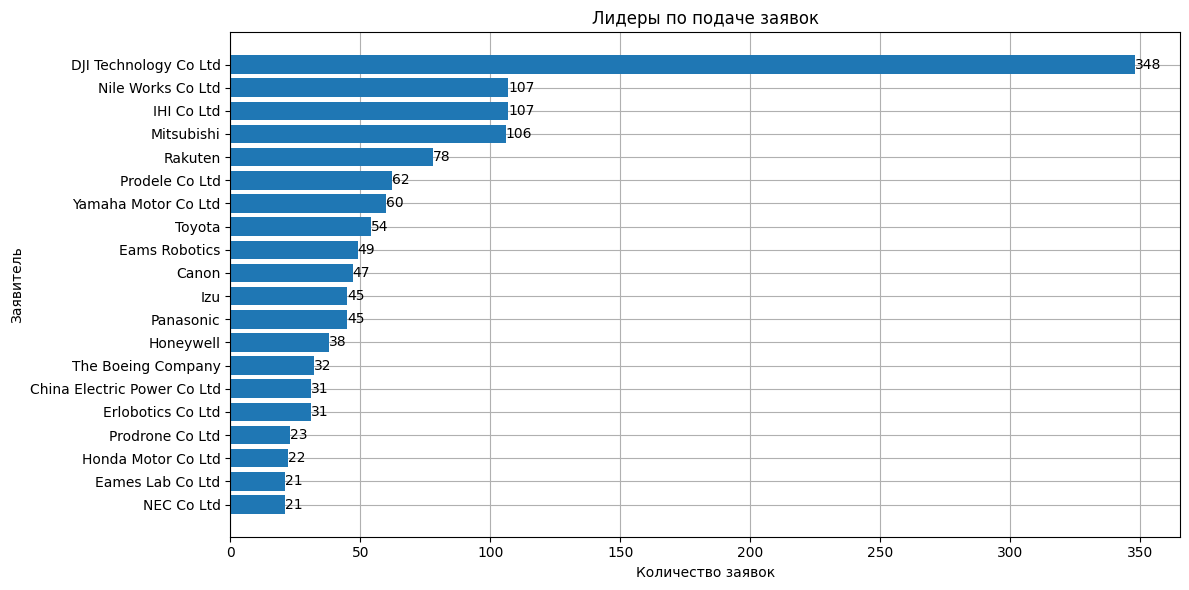

In [54]:
# prompt: visualize applicants as barh
applicants = expanded_df.assignee
applicant_counts = applicants.value_counts().head(20)

# Create the horizontal bar plot
plt.figure(figsize=FIGSIZE)  # Adjust figure size as needed
plt.barh(applicant_counts.index, applicant_counts.values)
plt.xlabel('Количество заявок')
plt.ylabel('Заявитель')
plt.title('Лидеры по подаче заявок')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent applicants at the top
plt.tight_layout()
plt.grid(True)
plt.gca().set_axisbelow(True)

for index, value in enumerate(applicant_counts):
    plt.text(value, index, str(value), va='center')
plt.savefig(country + '_подача заявок лидерами.svg', format='svg')
plt.show()

<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12478 (\N{KATAKANA LETTER ZO}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from current font.
  plt.tight_layout()
<ipython-input-55-160777038cdf>:11: UserWarning: Glyph 12525 (\N

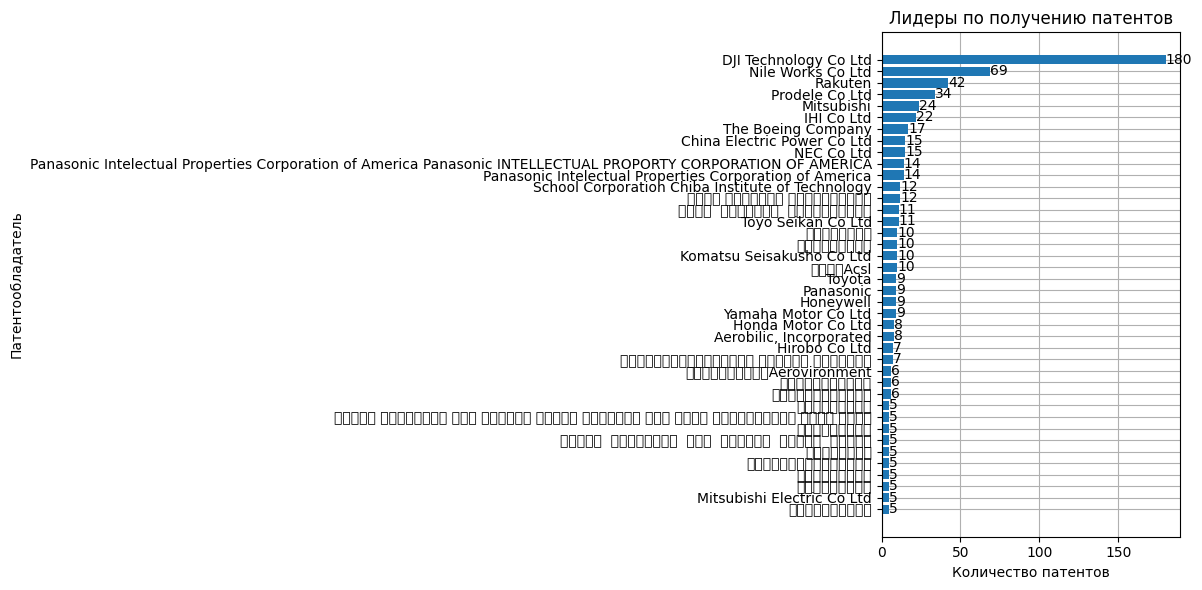

In [55]:
patentees = expanded_df.dropna(subset=['grant date']).assignee
patentees_counts = patentees.value_counts().head(40)

# Create the horizontal bar plot
plt.figure(figsize=FIGSIZE)  # Adjust figure size as needed
plt.barh(patentees_counts.index, patentees_counts.values)
plt.xlabel('Количество патентов')
plt.ylabel('Патентообладатель')
plt.title('Лидеры по получению патентов')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent applicants at the top
plt.tight_layout()
plt.grid(True)
plt.gca().set_axisbelow(True)

for index, value in enumerate(patentees_counts):
    plt.text(value, index, str(value), va='center')
plt.show()

In [56]:
# prompt: merge applicant_counts and patentees_count

merged_counts = pd.concat([applicant_counts, patentees_counts], axis=1)
merged_counts.columns = ['Applicant Counts', 'Patentee Counts']
merged_counts['Percentage'] = merged_counts['Patentee Counts'] / merged_counts['Applicant Counts'] * 100
for col in merged_counts.columns:
    merged_counts[col] = pd.to_numeric(merged_counts[col], errors='coerce').fillna(0).astype(int)
merged_counts

,Applicant Counts,Patentee Counts,Percentage
assignee,,,
DJI Technology Co Ltd,348,180,51
Nile Works Co Ltd,107,69,64
IHI Co Ltd,107,22,20
Mitsubishi,106,24,22
Rakuten,78,42,53
Prodele Co Ltd,62,34,54
Yamaha Motor Co Ltd,60,9,15
Toyota,54,9,16
Eams Robotics,49,0,0


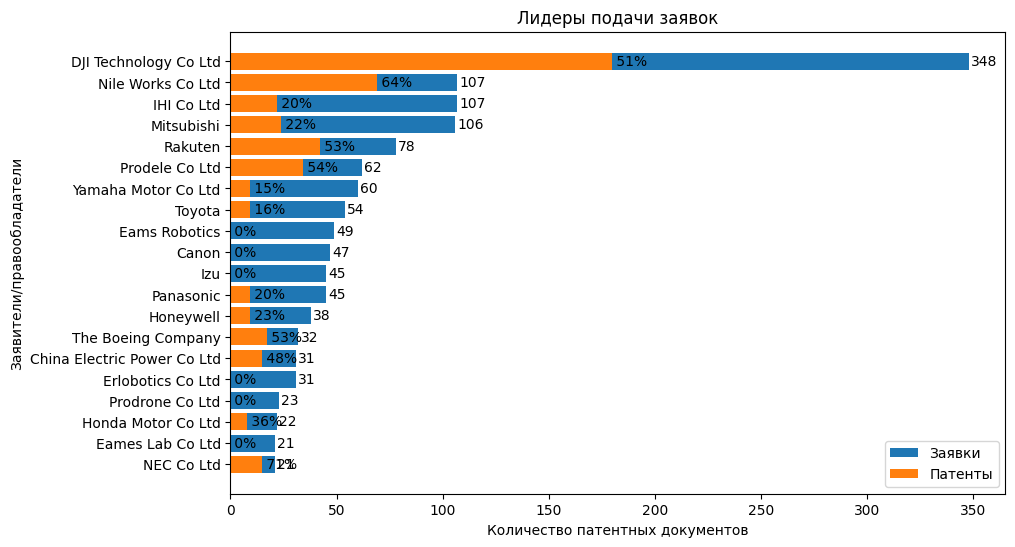

<Figure size 1200x600 with 0 Axes>

In [57]:
# prompt: show on one barh grapn patentees_counts and applicant_counts and show values of applicant_counts and persent of patentees_counts with respect to applicant_counts  values

import matplotlib.pyplot as plt

# Assuming applicant_counts and patentees_counts are already defined from the previous code

# Combine the data for the plot
data = merged_counts.head(20)

# Calculate the percentage of patentees with respect to applicants



# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
ax.barh(data.index, data['Applicant Counts'], label='Заявки')
ax.barh(data.index, data['Patentee Counts'], label='Патенты')

plt.figure(figsize=FIGSIZE)

# Add labels for Applicant Counts
for i, v in enumerate(data['Applicant Counts']):
    ax.text(v + 1, i, str(v), color='black', va='center')

# Add labels for Patentee Counts and Percentage
for i, (v, p) in enumerate(zip(data['Patentee Counts'], data['Percentage'])):
    if p > 92:
      shift = 10
    else:
      shift = 0
    ax.text(v - shift, i , f' {p:.0f}%', color='black', va='center')


ax.set_xlabel('Количество патентных документов')
ax.set_ylabel('Заявители/правообладатели')
ax.set_title('Лидеры подачи заявок')
ax.invert_yaxis()
ax.legend()
plt.tight_layout()
plt.show()
#plt.savefig(country + '_подача заявок лидерами.svg', format='svg')

In [58]:
top_app = data.index[:20]

In [59]:

expanded_df['filing/creation date'] = pd.to_datetime(expanded_df['filing/creation date'], errors='coerce')
expanded_df['filing_year'] = expanded_df['filing/creation date'].dt.year

In [60]:
# prompt: for each of top_app contained in combined_df.assignee find how many applications was filed each year according to combined_dataframe['filing_year']

# Group by assignee and filing year, then count the number of applications
application_counts = expanded_df[expanded_df['assignee'].isin(top_app)].groupby(['assignee', 'filing_year']).size().unstack(fill_value=0)

application_counts

filing_year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
assignee,,,,,,,,,,,,,,,,,,,,,
Canon,0,0,0,0,0,0,0,0,0,0,...,1,26,10,4,5,0,0,1,0,0
China Electric Power Co Ltd,7,0,2,0,0,0,1,0,0,0,...,0,5,7,1,1,0,1,2,3,0
DJI Technology Co Ltd,0,0,0,0,0,2,3,4,2,8,...,66,82,50,29,22,16,3,1,0,0
Eames Lab Co Ltd,0,0,0,0,0,0,0,0,0,0,...,0,0,6,14,1,0,0,0,0,0
Eams Robotics,0,0,0,0,0,0,0,0,0,0,...,0,0,12,28,7,1,1,0,0,0
Erlobotics Co Ltd,0,0,0,0,0,0,0,0,0,0,...,0,0,6,14,7,3,1,0,0,0
Honda Motor Co Ltd,0,0,0,0,2,0,0,0,0,0,...,7,5,1,4,1,2,0,0,0,0
Honeywell,0,0,1,2,4,25,3,1,2,0,...,0,0,0,0,0,0,0,0,0,0
IHI Co Ltd,0,0,0,0,12,10,8,7,8,4,...,0,4,9,5,14,16,0,4,2,4


In [61]:
df_sorted = application_counts.loc[application_counts.sum(axis=1).sort_values(ascending=False).index]
df_sorted

filing_year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
assignee,,,,,,,,,,,,,,,,,,,,,
DJI Technology Co Ltd,0,0,0,0,0,2,3,4,2,8,...,66,82,50,29,22,16,3,1,0,0
IHI Co Ltd,0,0,0,0,12,10,8,7,8,4,...,0,4,9,5,14,16,0,4,2,4
Nile Works Co Ltd,0,0,0,0,0,0,0,0,0,0,...,0,2,1,4,58,35,4,3,0,0
Mitsubishi,0,0,0,0,4,2,3,0,7,1,...,2,3,3,23,40,2,6,5,0,1
Rakuten,0,0,0,0,0,0,0,0,0,0,...,1,1,2,12,15,10,9,22,6,0
Prodele Co Ltd,0,0,0,0,0,0,0,0,0,0,...,4,23,9,12,6,6,2,0,0,0
Yamaha Motor Co Ltd,3,20,19,0,4,0,0,0,2,3,...,0,1,3,0,2,3,0,0,0,0
Toyota,0,0,0,0,0,0,0,0,0,1,...,0,0,1,3,6,11,11,13,2,1
Eams Robotics,0,0,0,0,0,0,0,0,0,0,...,0,0,12,28,7,1,1,0,0,0


In [62]:
years_all[::2]

[2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

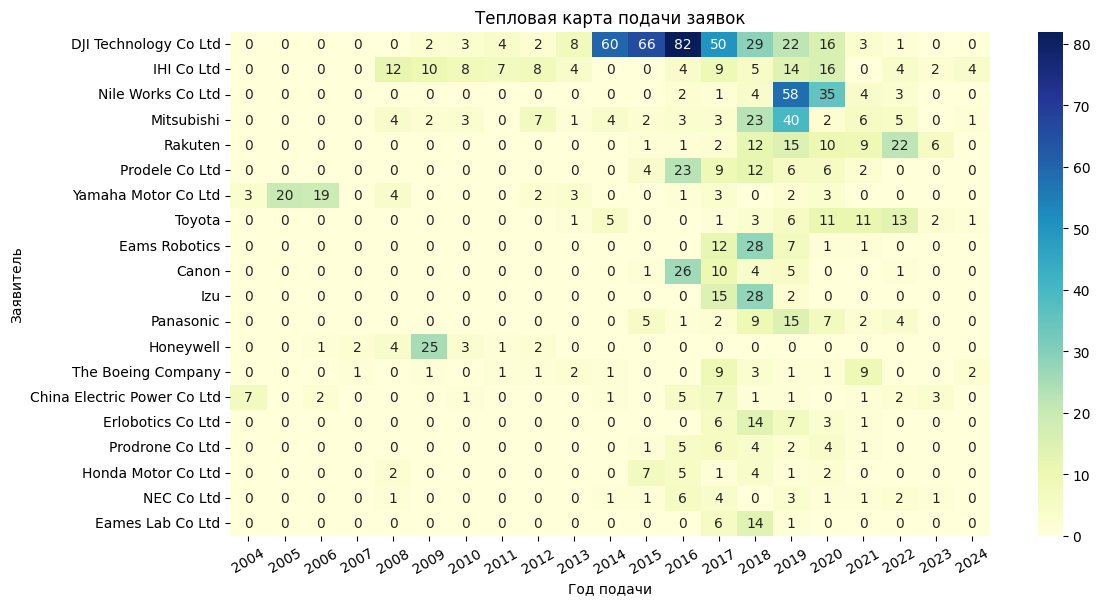

In [63]:
# prompt: show heatmap of df_sorted and save the graph as svg

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=FIGSIZE)
sns.heatmap(df_sorted, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Тепловая карта подачи заявок")
plt.xlabel("Год подачи")
plt.ylabel("Заявитель")
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig(country + '_heatmap_лидеров_подачи.svg', format='svg')
#plt.xticks(years_all[::2])
plt.show()

In [64]:
data

,Applicant Counts,Patentee Counts,Percentage
assignee,,,
DJI Technology Co Ltd,348,180,51
Nile Works Co Ltd,107,69,64
IHI Co Ltd,107,22,20
Mitsubishi,106,24,22
Rakuten,78,42,53
Prodele Co Ltd,62,34,54
Yamaha Motor Co Ltd,60,9,15
Toyota,54,9,16
Eams Robotics,49,0,0


<ipython-input-65-2799d5b49a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Percentage'] = (data['Patentee Counts'] / data['Applicant Counts']) * 100


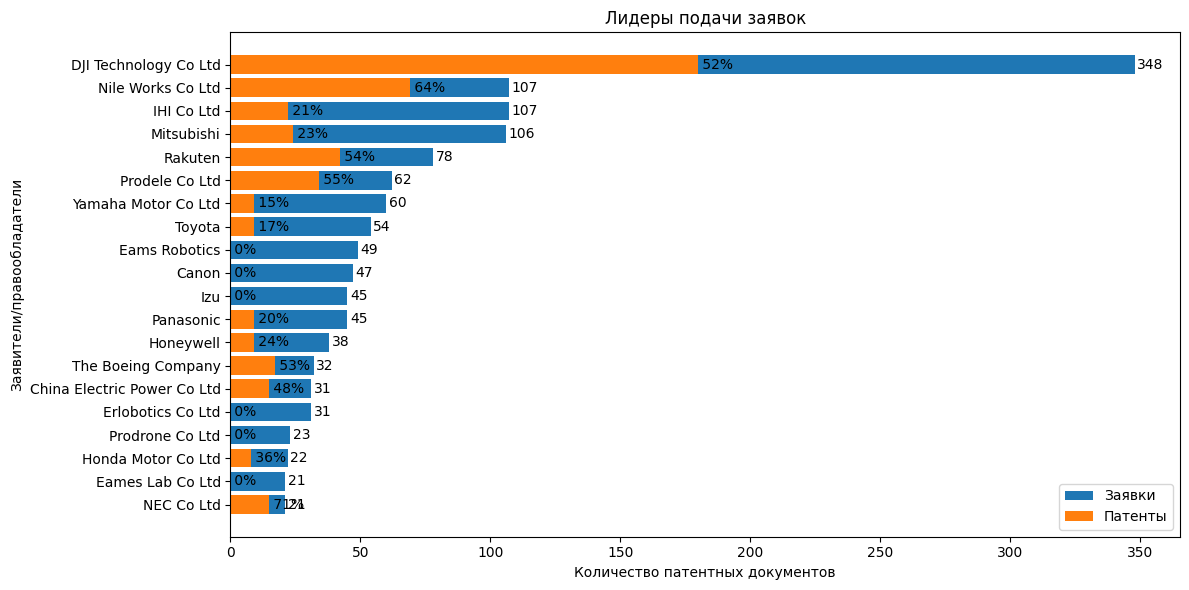

In [65]:

# Calculate the percentage of patentees with respect to applicants
data['Percentage'] = (data['Patentee Counts'] / data['Applicant Counts']) * 100

# Create the horizontal bar plot with adjusted size
fig, ax = plt.subplots(figsize=FIGSIZE)  # Set figure size here
ax.barh(data.index, data['Applicant Counts'], label='Заявки')
ax.barh(data.index, data['Patentee Counts'], label='Патенты')

# Add labels for Applicant Counts
for i, v in enumerate(data['Applicant Counts']):
    ax.text(v + 1, i, str(v), color='black', va='center')

# Add labels for Patentee Counts and Percentage
for i, (v, p) in enumerate(zip(data['Patentee Counts'], data['Percentage'])):
    ax.text(v - 0, i, f' {p:.0f}%', color='black', va='center')

# Configure labels, legend, and layout
ax.set_xlabel('Количество патентных документов')
ax.set_ylabel('Заявители/правообладатели')
ax.set_title('Лидеры подачи заявок')
ax.invert_yaxis()
ax.legend()
plt.tight_layout()

# Save the plot as an SVG file
#plt.savefig(country + '_лидеры подачи заявок.svg', format='svg')

plt.show()


In [66]:
countries_df = pd.read_csv('/content/динамика по странам.txt', sep='\t', index_col='страна')
countries_df

FileNotFoundError: [Errno 2] No such file or directory: '/content/динамика по странам.txt'

In [ ]:
years_for_graph = list(countries_df.index)
years_for_graph

In [ ]:
# prompt: show graph of CN and sum of all  except CN from countries_df

import matplotlib.pyplot as plt

# Assuming countries_df is already defined and loaded as in the previous response

# Calculate the sum of all columns except 'CN'
other_countries_sum = countries_df.drop(columns='CN').sum(axis=1)
all_countries_sum = countries_df.sum(axis=1)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(all_countries_sum, label='Все страны-лидеры')
plt.plot(countries_df['CN'], label='Китай')
plt.plot(other_countries_sum, label='Все страны кроме Китая')

plt.xlabel('Год')  # Replace with appropriate x-axis label if known
plt.ylabel('Количество заявок')
plt.title('Динамика подачи заявок странами-лидерами')
plt.legend()
plt.xticks(years_for_graph[::2])
plt.grid(True)
plt.show()

In [ ]:
other_countries_sum = countries_df.drop(columns='CN').sum(axis=1)
all_countries_sum = countries_df.sum(axis=1)

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(countries_df['US'], label='США')
plt.plot(countries_df['JP'], label='Япония')
plt.plot(countries_df['KR'], label='Южная корая')
plt.plot(countries_df['RU'], label='Россия')
plt.plot(countries_df['EP'], label='ЕПВ')


plt.xlabel('Год')  # Replace with appropriate x-axis label if known
plt.ylabel('Количество заявок')
plt.title('Динамика подачи заявок странами-лидерами')
plt.legend()
plt.xticks(years_for_graph[::2])
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

In [ ]:
file_name = file_paths[0].split('/')[-1].split('.')[0] + '_output.xlsx' # file for saving output data
file_name

In [ ]:

LANGUAGE_CODE = 'zh-CN'
#LANGUAGE_CODE = 'korean'
#LANGUAGE_CODE = 'japanese'
#LANGUAGE_CODE = 'eng'

In [ ]:
total_df = pd.DataFrame()
for file_path in file_paths:
  df = pd.read_csv(file_path, skiprows=1) # 1 - for others except CN
  print(len(df))
  total_df = pd.concat([total_df, df])
print(len(total_df))
total_df = total_df.dropna(subset=['assignee'])
total_df.info()

# анализ патентообладателей

In [ ]:
expanded_df.columns

In [ ]:
patentee_df = expanded_df.dropna(subset=['grant date'])
print(len(patentee_df))
top_patentee_names = expanded_df.dropna(subset=['grant date'])['assignee'].value_counts().head(50).index
top_patentee_names

In [ ]:

translator = Translator()

translated_patentee_names = []
for name in top_patentee_names:
    try:
        translation = translator.translate(name, dest='en')
        translated_patentee_names.append(translation.text)
    except Exception as e:
        print(f"Error translating '{name}': {e}")
        translated_patentee_names.append(name)  # Keep the original name if translation fails
translated_patentee_names


In [ ]:
translate_dictionary_2 = dict(zip(top_applicants_names, translated_names))
translate_dictionary_2

top_patentee_data = expanded_df.assignee.value_counts().head(40)


applicants = expanded_df.assignee
patentee_counts = applicants.value_counts().head(40)

# Create the horizontal bar plot
plt.figure(figsize=FIGSIZE)  # Adjust figure size as needed
plt.barh(applicant_counts.index, applicant_counts.values)
plt.xlabel('Количество заявок')
plt.ylabel('Заявитель')
plt.title('Лидеры по подаче заявок')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent applicants at the top
plt.tight_layout()
plt.grid(True)
plt.gca().set_axisbelow(True)

for index, value in enumerate(applicant_counts):
    plt.text(value, index, str(value), va='center')
plt.show()


In [ ]:
patentee_counts

# filter by dates

In [ ]:
total_df['filing/creation date'] = pd.to_datetime(total_df['filing/creation date'], errors='coerce')
year_min = total_df['filing/creation date'].min().year
year_max = total_df['filing/creation date'].max().year
years_all = list(range(int(year_min), int(year_max)+1))
year_min, year_max

# filter by title words

In [ ]:
# prompt: exclude from total_df rows if title column contains one of the following words: object or success or detect

# ... (your existing code)

# filter by title words
keywords = ['marine ', 'underwater', 'submerg', 'ground vehicle']
pattern = '|'.join(keywords)
print(len(total_df))
total_df_2 = total_df[~total_df['title'].str.contains(pattern, case=False, na=False)]
print(len(total_df_2))

In [ ]:
total_df = total_df_2.copy()

# main processing

In [ ]:
total_df = total_df.drop(columns=['result link', 'representative figure link'])


In [ ]:
total_df.head(3)

In [ ]:
# prompt: split total_df.assignee by comma and duplicte rows for each of splitted assignees

# Create a list to store the new rows
new_rows = []

# Iterate over the rows of the DataFrame
for index, row in total_df.iterrows():
    # Split the assignees by comma
    assignees = row['assignee'].split(',')

    # Iterate over the split assignees
    for assignee in assignees:
        # Create a copy of the row
        new_row = row.copy()

        # Update the assignee in the new row
        new_row['assignee'] = assignee.strip()

        # Append the new row to the list
        new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
total_df = pd.DataFrame(new_rows)

In [ ]:
total_df.info()

In [ ]:

top_applicants = total_df.assignee.value_counts().head(40)
top_applicants_names = top_applicants.index
top_applicants_names

In [ ]:
# prompt: translate total_df.assignee using GoogleTranslator
dictionary = {}
if LANGUAGE_CODE != 'eng':
  # Translate 'assignee' column
  translated_assignees = []
  for assignee in top_applicants_names:
      try:
          translated = GoogleTranslator(source=LANGUAGE_CODE, target='en').translate(assignee)
          translated_assignees.append(translated)
          dictionary[assignee] = translated
      except Exception as e:
          print(f"Translation error for '{assignee}': {e}")
          translated_assignees.append(assignee)  # Keep original if translation fails
          dictionary[assignee] = assignee

translate_dictionary =  dictionary
translate_dictionary

In [ ]:
total_df.info()

In [ ]:
# prompt: replace total_df.assignee values by translate_dictionary values

# Replace assignee values with translated values from translate_dictionary
total_df['assignee_translated'] = total_df['assignee'].map(translate_dictionary).fillna(total_df['assignee'])

In [ ]:
total_df.head(3)

In [ ]:
# prompt: translate unique_assignees.assignee using translate_dictionary
all_applicants_data_df = total_df.copy()
all_applicants_data_df.assignee_translated.value_counts()

In [ ]:
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(translate_dictionary)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Co., Ltd.', 'Co. Ltd.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Sz Dji Technology Co. Ltd., Sz Dji Technology Co. Ltd.', 'Sz Dji Technology Co. Ltd.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Sz Dji Technology Co. Ltd., Sz Dji Technology Co Ltd, Sz Dji Technology Co. Ltd.', 'Sz Dji Technology Co. Ltd.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('エスゼット ディージェイアイ テクノロジー カンパニー リミテッド', 'Sz Dji Technology Co. Ltd.', regex=False)

all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Toyota Industries Corp', 'Toyota', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Toyota Motor Corp', 'Toyota', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Toyota, Toyotaoration', 'Toyota', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Toyotaoration', 'Toyota', regex=False)

all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Mitsubishi Logisnext Co. Ltd.', 'Mitsubishi', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Mitsubishi Logisnext Co Ltd', 'Mitsubishi', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Rakuten Group, Inc.', 'Rakuten, Inc.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Parrot Drones, Parrot Drones', 'Parrot', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Nippon Yusoki Co Ltd, Nippon Yusoki Co Ltd', 'Nippon Yusoki Co Ltd', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Komatsu Ltd.', 'Komatsu Ltd', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Yamaha Motor Co. Ltd.', 'Yamaha Motor Co Ltd', regex=False)

all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Nileworks Inc.', 'Nileworks Inc', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Mitsubishi Heavy Industries, Ltd.', 'Mitsubishi', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Mitsubishi Nichiyu Forklift Co Ltd', 'Mitsubishi', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('三菱電機株式会社, Mitsubishi Electric Corp', 'Mitsubishi', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('本田技研工業株式会社, Honda Motor Co Ltd', 'Honda', regex=False)

all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Panasonic Intellectual Property Corporation of America, Panasonic Intellectual Property Corporation of America', 'Panasonic IP Management Co. Ltd.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('パナソニックＩｐマネジメント株式会社, Panasonic Ip Management Corp', 'Panasonic IP Management Co. Ltd.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('株式会社豊田自動織機', 'Toyota', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('三菱電機株式会社', 'Mitsubishi', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Parrot Drones', 'Parrot', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Telefonaktiebolaget LM Ericsson (publ)', 'Telefonaktiebolaget LM Ericsson (PUBL)', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('BAE Systems PLC', 'BAE SYSTEMS plc', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Sony Group Corporation, Sony Europe B.V.', 'Sony Group Corporation', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('SZ DJI Osmo Technology Co. Ltd.', 'SZ DJI Technology Co. Ltd.', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Co. Ltd.', 'Co Ltd', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Co., Ltd.', 'Co Ltd', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Wal-Mart Stores, Inc.', 'Walmart Apollo, Llc', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].str.replace('Co., Ltd', 'Co Ltd', regex=False)
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace({'korea': 'Republic of Korea'})
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace({'プロドローン Co Ltd': 'Prodrone Co Ltd'})
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace({'Shenzhen Datong Intelligent Aviation Technology Co Ltd': 'Shenzhen Daotong Intelligent Aviation Technology Co Ltd'})
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace({'Nippon Telegraph and Telephone Corporation': 'Nippon Electric Corporation'})

replace_list_1 = {'INSITU, INC. a subsidiary of The Boeing Company',
 'Insitu, Inc. (a Subsidiary Of The Boeing Company)',
 'Insitu, Inc. (a Subsidiary Of The Boeing Company), University of Washington',
 'Insitu, Inc., a subsidiary of The Boeing Company',
 'The Boeing Company',
 'Insitu, INC.',
 'Insitu, Inc.'}
final_name = 'The Boeing Company and Insitu'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Insitu Inc., A Subsidiary Of The Boeing Company', 'Insitu, Inc', 'Insitu Inc.', 'Insitu, Inc., University Of Washington Through Its Center For Commercialization', 'The Boeing Company and Insitu', 'Insitu, Inc. (A Subsidiary Of The Boeing Company)'}
final_name = 'The Boeing Company and Insitu'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'The Boeing Company and Insitu', 'InSitu, Inc., a subsidiary of the Boeing Company', 'Aurora Flight Sciences Corporation, a subsidiary of The Boeing Company'}
final_name = 'The Boeing Company and Insitu'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Honeywell International',
 'Honeywell International Inc.',
 'Honeywell International, Inc.'}
final_name = 'Honeywell International'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Samsung C&T Corp', 'Samsung SDI Co Ltd', 'Samsung C&T Corporation', 'Samsung Electronics Co Ltd'}
final_name = 'Samsung'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Beijing Xiaomi Mobile Software Co Ltd', 'Xiaomi Inc.'}
final_name = 'Xiaomi'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'BAE Systems Plc', 'BAE Systems Plc.', 'BAE SYSTEMS plc'}
final_name = 'BAE Systems'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Airbus (Sas)', 'Airbus Operations GmbH, Altran Deutschland S.A.S. & Co. KG', 'Airbus Operations GmbH, HENSOLDT Sensors GmbH', 'Airbus SAS', 'Airbus Helicopters', 'Airbus Defence and Space SA', 'Airbus Defence and Space Limited', 'Airbus Defence and Space', 'A^3 By Airbus LLC', 'Airbus Defence And Space Gmbh', 'Airbus Defence and Space GmbH', 'Airbus Defence and Space SAS'}
final_name = 'Airbus'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Sony Interactive Entertainment Inc.', 'Sony Group Corporation', 'Sony Corporation, Sony Europe B.V.', 'Sony Corporation', 'Sony Group Corporation, Sony Corporation of America'}
final_name = 'Sony'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Ford Global Technologies Llc', 'Ford Global Technologies', 'Ford Motor Company', 'Ford Global Technologies, Llc', 'Weon Kook KIM, Jin Kyo SHIN, Kwang Rae KIM, Fordrone Co Ltd', 'Franhofer-Gesellschaft Zur Forderung Der Angewandt Forschung E.V., Atlas Elektronik Gmbh', 'Fordrone Co Ltd'}
final_name = 'Ford'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Guangzhou Xaircraft Technology Co.,Ltd.', 'Guangzhou Xaircraft Technology Co Ltd'}
final_name = 'Xaircraft'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Panasonic Intellectual Property Corporation Of America', 'Panasonic Intellectual Property Management Co Ltd', 'Panasonic Automotive Systems Company Of America, Division Of Panasonic Corporation Of North America'}
final_name = 'Panasonic'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Autel Robotics Usa Llc', 'Autel Europe Gmbh', 'Autel Robotics Europe Gmbh', 'Autel Robotics Co Ltd', 'Autel Robotics., LTD.', 'Autel Robotics Co.,Ltd.', 'Autel Robotics Co Ltd, Autel Hunan Co Ltd'}
final_name = 'Autel'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Lg Innotek Co Ltd', 'Lg Electronics Inc., Industry-University Cooperation Foundation Korea Aerospace University', 'Lg Electronics Inc.'}
final_name = 'Lg Electronics'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Hyundai Motor Company, Kia Motors Corporation, Ajou University Industry-Academic Cooperation Foundation', 'Hyundai Motor Company, Kia Corporation', 'Hyundai Motor Company, Kia Motors Corporation', 'Hyundai Motor Company, Kia Corporation, Yong San Co Ltd'}
final_name = 'Hyundai and Kia'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Amazon Technologies Inc.', 'Amazon Technologies, Inc.'}
final_name = 'Amazon'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Telefonaktiebolaget Lm Ericsson (Publ)', 'Telefonaktiebolaget LM Ericsson (Publ)', 'Telefonaktiebolaget LM Ericsson (PUBL)'}
final_name = 'Telefonaktiebolaget LM Ericsson'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)

replace_list_1 = {'Shenzhen DJI Innovations Technology Co Ltd', 'SZ DJI Technology Co Ltd', 'Shenzhen DJI Osmo Technology Co Ltd'}
final_name = 'DJI Technology Co Ltd'
all_applicants_data_df['assignee'] = all_applicants_data_df['assignee'].replace(list(replace_list_1), final_name)



In [ ]:
all_applicants_data_df.assignee.value_counts().head(20)

In [ ]:
applicants

In [ ]:
# prompt: visualize applicants as barh
applicants = expanded_df.assignee
applicant_counts = applicants.value_counts().head(20)

# Create the horizontal bar plot
plt.figure(figsize=FIGSIZE)  # Adjust figure size as needed
plt.barh(applicant_counts.index, applicant_counts.values)
plt.xlabel('Количество заявок')
plt.ylabel('Заявитель')
plt.title('Лидеры по подаче заявок')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent applicants at the top
plt.tight_layout()
plt.grid(True)
plt.gca().set_axisbelow(True)

for index, value in enumerate(applicant_counts):
    plt.text(value, index, str(value), va='center')

plt.show()

In [ ]:
len(all_applicants_data_df), len(total_df_2)

In [ ]:
total_df_2.head(3)

In [ ]:
total_df_2.columns

In [ ]:
# Convert the 'date' column to datetime objects if it's not already
total_df_2['filing/creation date'] = pd.to_datetime(total_df_2['filing/creation date'])

# Extract the year from the 'date' column
total_df_2['filing/creation year'] = total_df_2['filing/creation date'].dt.year

# Count the number of applications filed in each year
applications_per_year = total_df_2['filing/creation year'].value_counts().sort_index()
applications_per_year.index = applications_per_year.index.astype(int)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(applications_per_year.index, applications_per_year.values)
plt.xlabel('Год')
plt.ylabel('Количество заявок')
plt.title('Динамика поданных заявок')
plt.xticks(years_all)
plt.grid(True)
plt.gca().set_axisbelow(True)
# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # Adjust 1 for vertical spacing

plt.show()

In [ ]:
# prompt: drop values of df['patent number] if it is nan
print(len(total_df_2))
df_granted = total_df_2.dropna(subset=['grant date'])

len(df_granted)

In [ ]:
total_df_filed_granted = df_granted

# Convert the 'date' column to datetime objects if it's not already
total_df_filed_granted['filing/creation date'] = pd.to_datetime(total_df_filed_granted['filing/creation date'])

# Extract the year from the 'date' column
total_df_filed_granted['filing/creation year'] = total_df_filed_granted['filing/creation date'].dt.year

# Count the number of applications filed in each year
granted_applications_per_year = total_df_filed_granted['filing/creation year'].value_counts().sort_index()
granted_applications_per_year.index = granted_applications_per_year.index.astype(int)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(granted_applications_per_year.index, granted_applications_per_year.values)
plt.xlabel('Год')
plt.ylabel('Количество заявок')
plt.title('Динамика поданных заявок, по которым выдан патент')
plt.xticks(years_all)
plt.grid(True)
plt.gca().set_axisbelow(True)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # Adjust 1 for vertical spacing

plt.show()

In [ ]:
granted_percentage = (granted_applications_per_year / applications_per_year) * 100

# Create the bar plot with overlapping bars
fig, ax = plt.subplots(figsize=(15, 6)) # Create figure and axes explicitly

# Plot applications_per_year
ax.bar(applications_per_year.index, applications_per_year.values, label='Поданные заявки', color='#1f77b4')

# Plot granted_applications_per_year
ax.bar(granted_applications_per_year.index, granted_applications_per_year.values, label='Выданные патенты', color='#ff7f0e')

# Add value labels for applications_per_year
for i, value in enumerate(applications_per_year):
  if i < 10:
    ax.text(applications_per_year.index[i], value + 600, str(value), ha='center', va='bottom') #Use index from series to set the x-position
  else:
    ax.text(applications_per_year.index[i], value, str(value), ha='center', va='bottom') #Use index from series to set the x-position

# Add percentage labels for granted_applications_per_year
for i, (value, percentage) in enumerate(zip(granted_applications_per_year, granted_percentage)):
    if i < 10:
        ax.text(granted_applications_per_year.index[i], value + 500, f'{percentage:.0f}%', ha='center', va='top') #Use index from series to set the x-position
    else:
        ax.text(granted_applications_per_year.index[i], value + 1, f'{percentage:.0f}%', ha='center', va='bottom') #Use index from series to set the x-position


ax.set_xlabel('Год') #Use axes object methods to set labels and titles
ax.set_ylabel('количество патентных документов')
ax.set_title('Заявки и выданные по ним патенты')
ax.set_xticks(years_all)
ax.legend()
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

In [ ]:
# prompt: Merge granted_applications_per_year  and applications_per_year

merged_data = pd.merge(applications_per_year, granted_applications_per_year, left_index=True, right_index=True, how='outer')
merged_data.rename(columns={'filing/creation year_x': 'total_applications', 'filing/creation year_y': 'granted_applications'}, inplace=True)
merged_data = merged_data.fillna(0)
merged_data.columns = ['поданные заявки', 'выданные патенты']
#merged_data.index = merged_data.index.astype(int)
merged_data

In [ ]:
import numpy as np

years_all = list(range(int(year_min), int(year_max)+1))
# prompt: show heat map of counts_applicant_df,
arr = np.array(list(range(len(years_all) + 1)) ) +0.5
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.heatmap(applications_by_year_top_20, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Тепловая карта подачи заявок")
plt.xlabel("Год")
plt.ylabel("Заявитель")
#xtick_positions = np.array(list(range(len(years_all) + 1)) + 0.5)[::2]  # Specify the positions where you want ticks
xtick_labels = years_all[::2]
ax.set_xticks(arr[::2])
ax.set_xticklabels(xtick_labels)

plt.show()

In [ ]:
# prompt: save merged_data, applicant_counts, applications_by_year_top_20 into excel file

with pd.ExcelWriter(LANGUAGE_CODE + '_output.xlsx') as writer:
    merged_data.to_excel(writer, sheet_name='merged_data')
    applicant_counts.to_excel(writer, sheet_name='applicant_counts')
    applications_by_year_top_20.to_excel(writer, sheet_name='applications_by_year_top_20')

In [ ]:
# prompt: show top_applicants_df as barh diagram and show top_applicants_df['number'] values on the diagram

# Assuming top_applicants_df is already defined as in the previous code

# Create the horizontal bar plot
plt.figure(figsize=FIGSIZE)  # Adjust figure size as needed
plt.barh(top_applicants_df['title_translated'], top_applicants_df['number'])

# Add the number values as text labels on the bars
for index, value in enumerate(top_applicants_df['number']):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Number of Applications')
plt.ylabel('Applicant')
plt.title('Top 20 Applicants')
plt.gca().invert_yaxis() #To display the largest applicant on top
plt.tight_layout() #To avoid labels overlapping
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

In [ ]:
top_applicants = list(translate_dictionary.values())[:20]
top_applicants

In [ ]:
# prompt: in total_df add new column which is translation of assignee from translate_dictionary

# Add a new column 'assignee_translated' to total_df
total_df['assignee_translated'] = total_df['assignee'].map(translate_dictionary)

# Fill NaN values in 'assignee_translated' with empty strings
total_df['assignee_translated'] = total_df['assignee_translated'].astype(str).fillna('')
total_df.head(3)

In [ ]:
# prompt: add new columns for every top_applicants  in total_df which represents presense of any of top_applicants in total_df['assignee_translated']

# Assuming top_applicants is a list of top applicant names (translated)

for applicant in top_applicants:
    total_df[applicant] = total_df['assignee_translated'].str.contains(applicant, na=False).astype(int)
total_df

In [ ]:

# Convert the 'date' column to datetime objects if it's not already
total_df['filing date'] = pd.to_datetime(total_df['filing/creation date'])

# Extract the year from the 'date' column
total_df['filing year'] = total_df['filing date'].dt.year

# Count the number of applications filed in each year
applications_per_year = total_df['filing year'].value_counts().sort_index()
applications_per_year.index = applications_per_year.index.astype(int)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(applications_per_year.index, applications_per_year.values)
plt.xlabel('Год')
plt.ylabel('Количество заявок')
plt.title('Динамика поданных заявок')
plt.xticks(years_all)
plt.grid(True)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # Adjust 1 for vertical spacing
plt.gca().set_axisbelow(True)
plt.show()

In [ ]:
total_df_filed_granted = total_df.dropna(subset=['grant date'])
len(total_df_filed_granted), len(total_df)


# Convert the 'date' column to datetime objects if it's not already
total_df_filed_granted['filing date'] = pd.to_datetime(total_df_filed_granted['filing/creation date'])

# Extract the year from the 'date' column
total_df_filed_granted['filing year'] = total_df_filed_granted['filing date'].dt.year

# Count the number of applications filed in each year
granted_applications_per_year = total_df_filed_granted['filing year'].value_counts().sort_index()
granted_applications_per_year.index = granted_applications_per_year.index.astype(int)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(granted_applications_per_year.index, granted_applications_per_year.values)
plt.xlabel('Год')
plt.ylabel('Количество заявок')
plt.title('Динамика поданных заявок по которым выдан патент')
plt.xticks(years_all)
plt.grid(True)
plt.gca().set_axisbelow(True)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # Adjust 1 for vertical spacing
plt.gca().set_axisbelow(True)
plt.show()


In [ ]:
# prompt: show granted_applications_per_year and applications_per_year on one bar, bars shall overlapp each other and show values of applications_per_year and persent of granted_applications_per_year  with respect to applications_per_year

'''
Blue (#1f77b4)
Orange (#ff7f0e)
Green (#2ca02c)
Red (#d62728)
Purple (#9467bd)
Brown (#8c564b)
Pink (#e377c2)
Gray (#7f7f7f)
Olive (#bcbd22)
Cyan (#17becf)
'''
# Assuming applications_per_year and granted_applications_per_year are already defined as pandas Series

# Calculate the percentage of granted applications
granted_percentage = (granted_applications_per_year / applications_per_year) * 100

# Create the bar plot with overlapping bars
fig, ax = plt.subplots(figsize=(15, 6)) # Create figure and axes explicitly

# Plot applications_per_year
ax.bar(applications_per_year.index, applications_per_year.values, label='Applications', color='#1f77b4')

# Plot granted_applications_per_year
ax.bar(granted_applications_per_year.index, granted_applications_per_year.values, label='Granted Applications', color='#ff7f0e')

# Add value labels for applications_per_year
for i, value in enumerate(applications_per_year):
    ax.text(applications_per_year.index[i], value, str(value), ha='center', va='bottom') #Use index from series to set the x-position

# Add percentage labels for granted_applications_per_year
for i, (value, percentage) in enumerate(zip(granted_applications_per_year, granted_percentage)):

    if value > 10:
        ax.text(granted_applications_per_year.index[i], value, f'{percentage:.0f}%', ha='center', va='top') #Use index from series to set the x-position
    else:
        ax.text(granted_applications_per_year.index[i], value + 1, f'{percentage:.0f}%', ha='center', va='bottom') #Use index from series to set the x-position


ax.set_xlabel('Year') #Use axes object methods to set labels and titles
ax.set_ylabel('Number of Applications')
ax.set_title('Applications and Granted Applications Per Year')
ax.set_xticks(years_all)
ax.legend()
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

In [ ]:
applications_by_year_applicant = {}

for applicant in top_applicants_df['title_translated']:
  # Get the filtered DataFrame for the current applicant
  filtered_df = total_df_translated[total_df_translated['assignee'] == applicant]

  # Convert 'filing/creation date' to datetime objects if it's not already
  filtered_df['filing/creation date'] = pd.to_datetime(filtered_df['filing/creation date'])

  # Group by year and count applications, handling potential duplicate indices
  applications_by_year_applicant[applicant] = filtered_df.groupby(filtered_df['filing/creation date'].dt.year.rename('Year'))['filing/creation date'].count()
  # Rename the grouping column to 'Year'
  # This helps ensure a unique index and avoids the ValueError

In [ ]:
# prompt: make a dataframe with index keys of applications_by_year_applicant and columns years_all

import pandas as pd

# Assuming applications_by_year_applicant and years_all are defined as in your original code

# Create a DataFrame from the applications_by_year_applicant dictionary
filing_dynamic = pd.DataFrame(applications_by_year_applicant)

# Reindex the DataFrame to ensure all years are included, filling missing values with 0
filing_dynamic = filing_dynamic.reindex(years_all, fill_value=0)

# Set years_all as the index
filing_dynamic.index.name = 'years_all'

filing_dynamic = filing_dynamic.T
filing_dynamic = filing_dynamic.fillna(0)
filing_dynamic

In [ ]:
# prompt: show heat map of filing_dynamic and replace NaN with 0

import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filing_dynamic, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Filing Dynamic')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Applicant')
plt.show()

In [ ]:
# prompt: using translate_dictionary replace original assignees in total_df by translation
total_df['assignee'] = total_df['assignee'].replace(translate_dictionary)


In [ ]:
# prompt: filter total_df to comprise the assignees from translate_dictionary.values only

# Filter total_df to include only assignees present in translate_dictionary.values()
filtered_df = total_df[total_df['assignee'].isin(translate_dictionary.values())]

# частые слова в названии

In [ ]:
# prompt: find the most frequent values in total_df['title'] delete the following words from titles: [aerial, unmanned] and ignore capital letters or not

import pandas as pd

# Assuming total_df is your DataFrame and 'title' is the column containing titles
def most_frequent_titles(df, column_name='title'):
    # Convert the title column to lowercase and delete words
    words_to_delete = ['aerial', 'unmanned', 'vehicle', 'drone', 'aircraft', 'device', 'method', 'system', 'apparatus', ' and ']
    df[column_name] = df[column_name].astype(str).str.lower()
    for word in words_to_delete:
        df[column_name] = df[column_name].str.replace(word, '', regex=False)

    # Calculate value counts
    title_counts = df[column_name].value_counts()

    return title_counts

a = most_frequent_titles(total_df)
clear_words = []
for i in a.index:
    if len(i.strip()) > 2:
        print(i)
        clear_words.append(i)
# Example usage:
# frequent_titles = most_frequent_titles(total_df)
# print(frequent_titles)

In [ ]:
all_words_in_string = " ".join(clear_words)
all_words_in_string = all_words_in_string.replace(' a ', ' ')
all_words_in_string = all_words_in_string.replace(' an ', ' ')
all_words_in_string = all_words_in_string.replace(' s ', ' ')
all_words_in_string = all_words_in_string.replace(' for ', ' ')
all_words_in_string = all_words_in_string.replace('uav', ' ')
all_words_in_string = all_words_in_string.replace(' ss ', ' ')
all_words_in_string = all_words_in_string.replace(' based', ' ')
all_words_in_string = all_words_in_string.replace('thereof', ' ')
all_words_in_string = all_words_in_string.replace('using', ' ')


# облако слов

In [ ]:
# prompt: generate a word cloud of total_df['title'] and add stop words: method, system and ignore capital letters or not

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add custom stop words
stopwords = set(STOPWORDS)
stopwords.update(["method", "system"])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(all_words_in_string)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# save data

In [ ]:
total_df_translated.assignee.value_counts().head(40)

In [ ]:
applications_per_year

In [ ]:
granted_applications_per_year

In [ ]:
filing_dynamic

In [ ]:
# prompt: save total_df_translated.assignee.value_counts().head(40) and applications_per_year and granted_applications_per_year and filing_dynamic into excel file with name file_name

import pandas as pd

# Assuming total_df_translated, applications_per_year, granted_applications_per_year, and filing_dynamic are already defined

# Create a Pandas Excel writer using XlsxWriter as the engine.

writer = pd.ExcelWriter(file_name, engine='xlsxwriter')

# Write each Series or DataFrame to a different worksheet.
total_df_translated.assignee.value_counts().head(40).to_excel(writer, sheet_name='Top_Assignees')
applications_per_year.to_excel(writer, sheet_name='Applications_per_Year')
granted_applications_per_year.to_excel(writer, sheet_name='Granted_Applications_per_Year')
filing_dynamic.to_excel(writer, sheet_name='Filing_Dynamic')

# Close the Pandas Excel writer and output the Excel file.
# Use writer.close() instead of writer.save()
writer.close()